In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2Z0MTQ5NjgvUmVwb3MvaW50cm8tY29kaW5nLWRhdGEtYW5hbHlzaXMvcXVhcnRvLzA5'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/importlib/_bootstrap.py": 1716061061.963526, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/importlib/_bootstrap_external.py": 1716061061.9664707, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/zipimport.py": 1716061059.8541, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/codecs.py": 1716061059.3098388, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/aliases.py": 1716061060.5232508, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/__init__.py": 1716061060.520605, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/utf_8.py": 1716061061.3768034, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/abc.py": 1716061059.2254992, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/io.py": 1716061059.4591994, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/stat.py": 1716061059.7052634, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/_collections_abc.py": 17160

In [2]:
data_filename = "data/FIRST ORDER_k=0.0005.txt"

In [3]:
open_file = open(data_filename)
data_from_file = open_file.read()
print(data_from_file[0:200])

Time	A	B	
0	1	0	
100	0.950565	0.0494353	
200	0.903573	0.0964268	
300	0.858905	0.141095	
400	0.816445	0.183555	
500	0.776083	0.223917	
600	0.737717	0.262283	
700	0.701248	0.298752	
800	0.666582	0.33341


In [4]:
import numpy as np

data_kinetic_k0005 = np.genfromtxt("data/FIRST ORDER_k=0.0005.txt", names=True)

In [5]:
data_kinetic_k0005.dtype.names

('Time', 'A', 'B')

In [6]:
data_kinetic_k0005['A']

array([1.        , 0.950565  , 0.903573  , 0.858905  , 0.816445  ,
       0.776083  , 0.737717  , 0.701248  , 0.666582  , 0.633629  ,
       0.602305  , 0.57253   , 0.544227  , 0.517323  , 0.491749  ,
       0.467439  , 0.444331  , 0.422365  , 0.401486  , 0.381638  ,
       0.362772  , 0.344838  , 0.327791  , 0.311586  , 0.296183  ,
       0.281541  , 0.267623  , 0.254393  , 0.241817  , 0.229863  ,
       0.218499  , 0.207698  , 0.19743   , 0.18767   , 0.178393  ,
       0.169574  , 0.161191  , 0.153222  , 0.145648  , 0.138447  ,
       0.131603  , 0.125097  , 0.118913  , 0.113035  , 0.107447  ,
       0.102135  , 0.097086  , 0.0922865 , 0.0877243 , 0.0833876 ,
       0.0792653 , 0.0753468 , 0.071622  , 0.0680813 , 0.0647157 ,
       0.0615165 , 0.0584754 , 0.0555846 , 0.0528368 , 0.0502248 ,
       0.0477419 , 0.0453818 , 0.0431383 , 0.0410057 , 0.0389786 ,
       0.0370517 , 0.03522   , 0.0334789 , 0.0318239 , 0.0302506 ,
       0.0287552 , 0.0273337 , 0.0259824 , 0.024698  , 0.02347

In [7]:
data_kinetic_k0005 ['Time']

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
        7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
        8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
        8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
        9600.,  9700.,  9800.,  9900., 10000.])

In [8]:
# Extract time and concentration of A from our array
time = data_kinetic_k0005['Time']
concentration_A = data_kinetic_k0005["A"]

Text(0, 0.5, 'Concentration')

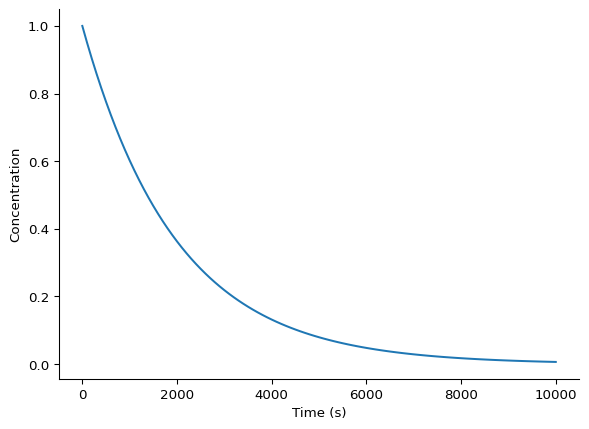

In [9]:
import matplotlib.pyplot as plt

# Create our Figure and Axes objects for plotting
fig, ax = plt.subplots()

# Plot our data - time vs concentration of A
ax.plot(time, concentration_A)

# Add x and y labels for this data
ax.set_xlabel("Time (s)")
ax.set_ylabel("Concentration")

In [10]:
mask = concentration_A <= 0.5
concentration_A_low = concentration_A[mask]
# Make sure to match the time values (index) to our filtered data
time_low = time[mask]

[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Concentration')]

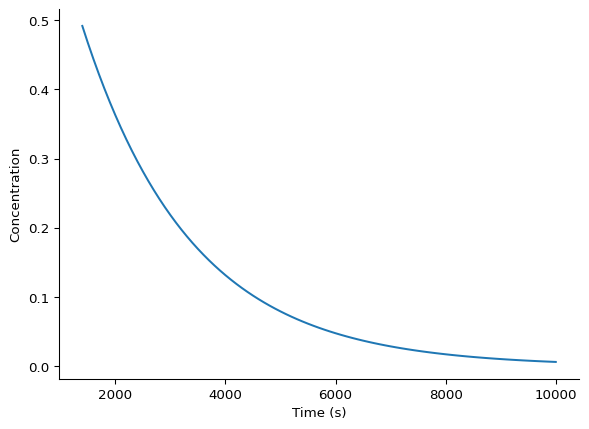

In [11]:
# Create our Figure and Axes objects for plotting
fig, ax = plt.subplots()

# Plot our data - time vs concentration of A
ax.plot(time_low, concentration_A_low)

# Note: Alternative syntax! we can set multiple properties at once
ax.set(xlabel = "Time (s)",  ylabel="Concentration")